## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
keras = tf.keras

## Meus dados WIN

In [2]:
path = r'C:\Users\adria\1Python\Meu_novo_projeto\WIN_N_1K\WIN_N_1k.csv'
raw = pd.read_csv(path, index_col=0, parse_dates=True)

In [3]:
df = pd.DataFrame()
df['close'] = raw['close']

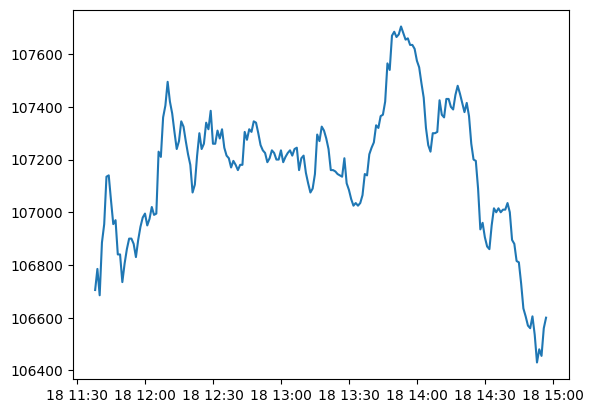

In [5]:
plt.plot(df['close'].iloc[:200])

In [6]:
df['r'] = df['close'].pct_change()

In [7]:
df = df.dropna()

In [8]:
series = df['r'].values

In [9]:
time = np.arange(len(series))

In [10]:
split_time = 80000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

## Moving Average

In [11]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast
     This implementation is *much* faster than the previous one"""
  mov = np.cumsum(series)
  mov[window_size:] = mov[window_size:] - mov[:-window_size]
  return mov[window_size - 1:-1] / window_size

In [12]:
moving_avg = moving_average_forecast(series, 5)[split_time - 5:]

In [13]:
len(moving_avg)

19998

In [15]:
moving_avg

array([ 3.26109573e-04,  1.23282048e-04, -4.39428220e-05, ...,
        7.57229701e-10,  7.57229701e-10,  7.57229701e-10])

In [14]:
len(x_valid)

19998

In [16]:
x_valid

array([ 2.64014785e-04, -3.51926799e-04,  2.20031685e-04, ...,
        0.00000000e+00, -4.35085277e-05, -4.35104207e-05])

In [17]:
diff_series = (series[10:] - series[:-10])
diff_time = time[10:]

In [18]:
diff_moving_avg = moving_average_forecast(diff_series, 5)[split_time - 10 - 5:]

In [19]:
len(diff_moving_avg)

19998

In [20]:
diff_moving_avg

array([ 2.20462229e-04,  1.40851681e-04,  4.40284299e-05, ...,
       -4.35145863e-05, -3.48109874e-05, -2.61092819e-05])

In [22]:
diff_moving_avg_plus_past = series[split_time - 10:-10] + diff_moving_avg

In [23]:
len(diff_moving_avg_plus_past)

19998

In [ ]:
keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy()

In [ ]:
keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy()

In [ ]:
plt.plot(time_valid, x_valid, linestyle="-", color="blue")
plt.plot(time_valid, x_valid linestyle="--", color="red")
plt.show()

In [ ]:
plt.plot(time_valid, x_valid, label='Dados 1')
plt.plot(time_valid, moving_avg, label='Dados 2')
# Exibe o plot
plt.show()

## DesRetorne os dados e verifique

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2['diff_moving_avg_plus_past'] = diff_moving_avg_plus_past

In [ ]:
df2['x_valid'] = x_valid

In [ ]:
df2

In [ ]:
df['close'].iloc[79999]

### desfazendo o x_valid

In [ ]:
ultimo_preco_fechamento = 113630.0

In [ ]:
df2['preco_valid'] = (1 + df2['x_valid']).cumprod()

In [ ]:
df2['preco_valid'] = ultimo_preco_fechamento * df2['preco_valid']

In [ ]:
df2

### desr a previsão

In [ ]:
df2['desr_prev'] = (1 + df2['diff_moving_avg_plus_past']).cumprod()

In [ ]:
df2['desr_prev'] = ultimo_preco_fechamento * df2['desr_prev']

In [ ]:
df2

In [ ]:
df2['diff'] = df2['preco_valid']-df2['desr_prev']

In [ ]:
df2

In [ ]:
df2['diff'].mean()

In [ ]:
plt.plot(df2['preco_valid'].iloc[:100], linestyle="-", color="b")
plt.plot(df2['desr_prev'].iloc[:100], linestyle="-", color="red")

plt.show()